In [1]:
import os, csv, json, collections
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
csv_file = './hand_gesture_pose.csv'

label_info = {}
with open(csv_file, 'r') as c:
    temp = csv.reader(c)
    for i, row in enumerate(temp):
        if i == 0: continue
        if int(row[0]) not in label_info:
            label_info[int(row[0])] = [row[1]] + row[-3:-1]

In [3]:
train_dir = './train/'

dic = {}
for num in sorted(os.listdir(train_dir)):
    with open(train_dir + '{}/{}.json'.format(num, num), 'r') as j:
        temp = json.load(j)
        if tuple(temp['action']) not in dic: dic[tuple(temp['action'])] = []
        dic[tuple(temp['action'])].append(num)
            
for label in sorted(dic.keys()):
    print(label, label_info[label[0]], dic[label])

(0, '숫자 1') ['number', 'my_hand', 'left'] ['0', '1']
(1, '숫자 2') ['number', 'my_hand', 'left'] ['53', '54', '55', '56', '57']
(2, '숫자 3') ['number', 'my_hand', 'left'] ['93', '94', '95', '96', '97']
(3, '숫자 4') ['number', 'my_hand', 'left'] ['131', '132', '133', '134', '135']
(4, '숫자 5') ['number', 'my_hand', 'left'] ['174', '175', '176', '177', '178']
(5, '숫자 6') ['number', 'my_hand', 'left'] ['212', '213', '214', '215']
(6, '숫자 7') ['number', 'my_hand', 'left'] ['253', '254', '255', '256', '257']
(7, '숫자 8') ['number', 'my_hand', 'left'] ['288', '289', '290', '291', '292']
(8, '숫자 9') ['number', 'my_hand', 'left'] ['319', '320', '321', '322', '323', '324']
(9, '숫자 0') ['number', 'my_hand', 'left'] ['347', '348', '349', '350', '351']
(10, '숫자 1') ['number', 'my_hand', 'right'] ['2', '3', '4', '5', '6']
(11, '숫자 2') ['number', 'my_hand', 'right'] ['10', '7', '8', '9']
(12, '숫자 3') ['number', 'my_hand', 'right'] ['11', '12', '13', '14', '15', '16']
(13, '숫자 4') ['number', 'my_hand', 'ri

In [4]:
train_dir = './train/'

images, labels, meanings = [], [], []
for num in sorted(os.listdir(train_dir)):
    with open(train_dir + '{}/{}.json'.format(num, num), 'r') as j:
        temp = json.load(j)
        for info in temp['annotations']:
            images.append(train_dir + '{}/{}.png'.format(num, info['image_id']))
            labels.append(temp['action'][0])
            meanings.append(temp['action'][1])
            
print(len(sorted(os.listdir(train_dir))))
print(len(images), len(labels), len(meanings))

649
5887 5887 5887


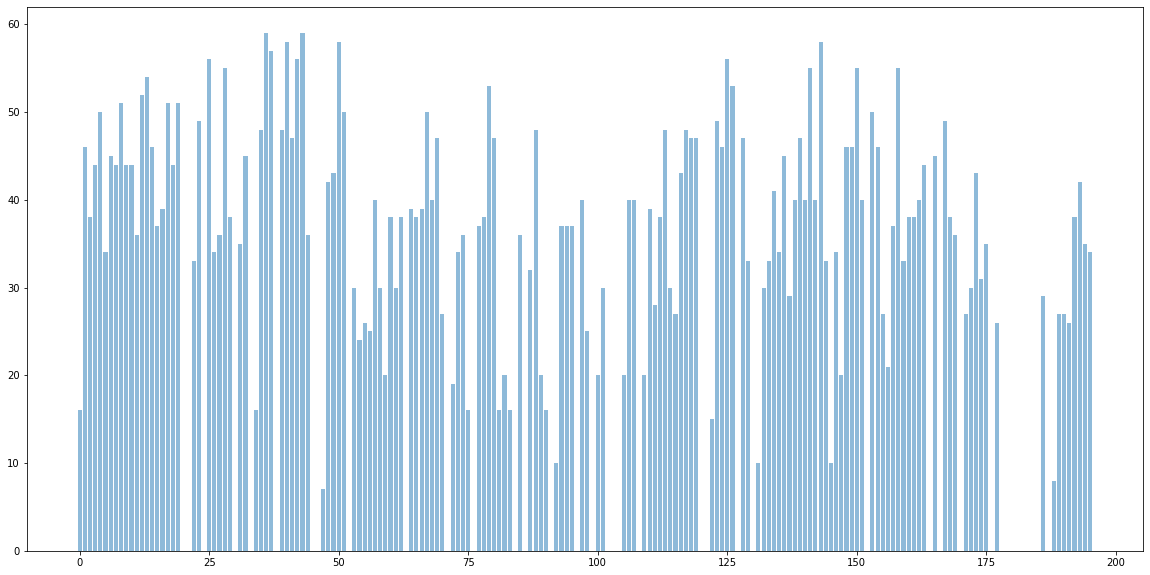

In [5]:
f = collections.Counter(labels)

plt.figure(figsize=(20, 10))
plt.bar(f.keys(), f.values(), alpha=0.5)
plt.show()

In [6]:
len(sorted(set(range(196)) - set(f.keys())))

39

In [7]:
sorted(set(range(196)) - set(f.keys()))

[20,
 21,
 24,
 30,
 33,
 38,
 45,
 46,
 52,
 63,
 71,
 76,
 84,
 86,
 91,
 96,
 99,
 102,
 103,
 104,
 108,
 120,
 121,
 127,
 130,
 152,
 164,
 166,
 170,
 176,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 187]

In [8]:
temp = 'Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9,Label_10,Label_11,Label_12,Label_13,Label_14,Label_15,Label_16,Label_17,Label_18,Label_19,Label_22,Label_23,Label_25,Label_26,Label_27,Label_28,Label_29,Label_31,Label_32,Label_34,Label_35,Label_36,Label_37,Label_39,Label_40,Label_41,Label_42,Label_43,Label_44,Label_47,Label_48,Label_49,Label_50,Label_51,Label_53,Label_54,Label_55,Label_56,Label_57,Label_58,Label_59,Label_60,Label_61,Label_62,Label_64,Label_65,Label_66,Label_67,Label_68,Label_69,Label_70,Label_72,Label_73,Label_74,Label_75,Label_77,Label_78,Label_79,Label_80,Label_81,Label_82,Label_83,Label_85,Label_87,Label_88,Label_89,Label_90,Label_92,Label_93,Label_94,Label_95,Label_97,Label_98,Label_100,Label_101,Label_105,Label_106,Label_107,Label_109,Label_110,Label_111,Label_112,Label_113,Label_114,Label_115,Label_116,Label_117,Label_118,Label_119,Label_122,Label_123,Label_124,Label_125,Label_126,Label_128,Label_129,Label_131,Label_132,Label_133,Label_134,Label_135,Label_136,Label_137,Label_138,Label_139,Label_140,Label_141,Label_142,Label_143,Label_144,Label_145,Label_146,Label_147,Label_148,Label_149,Label_150,Label_151,Label_153,Label_154,Label_155,Label_156,Label_157,Label_158,Label_159,Label_160,Label_161,Label_162,Label_163,Label_165,Label_167,Label_168,Label_169,Label_171,Label_172,Label_173,Label_174,Label_175,Label_177,Label_186,Label_188,Label_189,Label_190,Label_191,Label_192,Label_193,Label_194,Label_195'

In [9]:
labels = []
for label in temp.split(','):
    l = label.split('_')[1]
    labels.append(int(l))

In [10]:
len(set(range(196)) - set(labels))

39

In [11]:
set(range(196)) - set(labels)

{20,
 21,
 24,
 30,
 33,
 38,
 45,
 46,
 52,
 63,
 71,
 76,
 84,
 86,
 91,
 96,
 99,
 102,
 103,
 104,
 108,
 120,
 121,
 127,
 130,
 152,
 164,
 166,
 170,
 176,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 187}

In [12]:
train_dir = './train/'
test_dir = './test/'

images_size = {}
for num in sorted(os.listdir(train_dir)):
    with open(train_dir + '{}/{}.json'.format(num, num), 'r') as j:
        temp = json.load(j)
        for info in temp['annotations']:
            image = Image.open(train_dir + '{}/{}.png'.format(num, info['image_id']))
            if image.size not in images_size: images_size[image.size] = 0
            images_size[image.size] += 1
            
for num in sorted(os.listdir(test_dir)):
    with open(test_dir + '{}/{}.json'.format(num, num), 'r') as j:
        temp = json.load(j)
        for info in temp['annotations']:
            image = Image.open(test_dir + '{}/{}.png'.format(num, info['image_id']))
            if image.size not in images_size: images_size[image.size] = 0
            images_size[image.size] += 1
            
print(images_size)

{(1920, 1080): 7925}


In [14]:
count = []
for label in dic.keys():
    count.append(label[1])
    

import collections
collections.Counter(count)

Counter({'숫자 1': 2,
         '숫자 2': 2,
         '검지,중지 교차': 5,
         '엄지,중지 붙이기': 5,
         '엄지,소지 붙이기': 4,
         '파이팅': 5,
         '숫자 3': 2,
         '총': 5,
         '동그라미': 6,
         'OK': 5,
         '숫자 4': 2,
         '빅토리': 6,
         '부정(엄지손 아래로)': 5,
         '부정(검지 흔들기)': 4,
         '손바닥': 5,
         '약지,소지 가위': 5,
         '손가락 오므리기': 6,
         '전화모양': 6,
         '약속': 10,
         '숫자 5': 2,
         '손 안경': 6,
         '손가락 접기': 4,
         '최고': 5,
         '꼬집기': 3,
         '엄지,약지 붙이기': 4,
         '숫자 6': 2,
         '숫자 7': 2,
         '손하트': 2,
         '손 토끼': 3,
         '숫자 8': 2,
         '네모': 2,
         '세모': 2,
         '숫자 9': 2,
         'X': 2,
         '숫자 0': 2,
         '숫자1': 2,
         '숫자2': 2,
         '숫자6': 2,
         '숫자7': 2,
         '숫자8': 2,
         '숫자0': 2,
         '숫자3': 1,
         '숫자4': 1,
         '숫자5': 1,
         '숫자9': 1,
         '경고(주먹 내밀기)': 3,
         '주먹쥐기': 2,
         '큰하트': 1})